In [1]:
version

               _                           
platform       x86_64-apple-darwin13.4.0   
arch           x86_64                      
os             darwin13.4.0                
system         x86_64, darwin13.4.0        
status                                     
major          3                           
minor          6.1                         
year           2019                        
month          07                          
day            05                          
svn rev        76782                       
language       R                           
version.string R version 3.6.1 (2019-07-05)
nickname       Action of the Toes          

# Check for or install packages

In [2]:
library(devtools)
if (!"ggplot2" %in% installed.packages()) install.packages("ggplot2",repos="https://cloud.r-project.org")
if (!"ggtree" %in% installed.packages()) install_github("GuangchuangYu/ggtree")
if (!"RevGadgets" %in% installed.packages()) install_github("revbayes/RevGadgets")
if (packageVersion("rlang") < 0.4) install_github("r-lib/rlang") # needed for ggtree

Loading required package: usethis


# Load packages

In [11]:
library(ggtree)
library(RevGadgets)
library(ggplot2)

# Load input files

In [20]:
tree_fn = "five_area_DEC.tre.ase.tre"
label_fn = "five_area_DEC.state_labels.txt"
color_fn = "range_colors_5area.txt"

# Produce figure

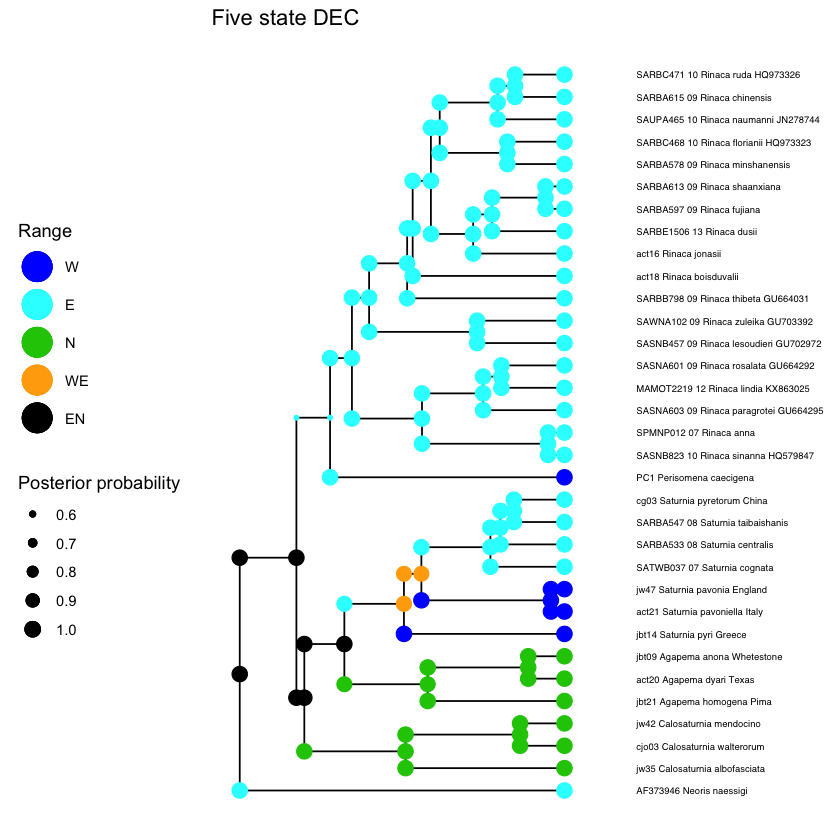

In [21]:
# set area names
area_names = c("W","E","N","A","B")

# get state labels
state_descriptions = read.csv(label_fn, header=T,
                              sep=",", colClasses="character")

# map presence-absence ranges to area names
range_labels = sapply(state_descriptions$range[2:nrow(state_descriptions)],
    function(x) {
        present = as.vector(gregexpr(pattern="1", x)[[1]])
        paste( area_names[present], collapse="")
    })

state_labels = range_labels
names(state_labels) = as.character(1:(nrow(state_descriptions)-1))

# generate colors for ranges
range_color_list = read.csv(color_fn, header=T, sep=",",
                            na.string="QQ", colClasses="character")
range_colors = range_color_list$color[ match(range_labels, range_color_list$range) ]

# plot ranges
pp = plot_ancestral_states(tree_file=tree_fn,
                      title="Five state DEC",
                      tree_layout="rectangular",
                      include_start_states=TRUE,
                      shoulder_label_size=0,
                      summary_statistic="MAPRange",
                      state_labels=state_labels,
                      state_colors=range_colors,
                      tip_node_size=4,
                      node_label_size=2,
                      node_size_range=c(1,4),
                      tip_label_size=2,
                      alpha=1,
                      show_posterior_legend=TRUE,
                      show_tree_scale=TRUE)

pp

# Save figure in PDF format

In [19]:
ggsave(file='plot_fn.pdf', plot=pp, device="pdf", height=7, width=10, useDingbats=F)